In [54]:
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
df = pd.read_csv('results/wind_tunnel_data_50K_calc_40K.csv')
# df = pd.read_csv('results/wind_tunnel_data_100K_calc_80K.csv')

In [56]:
# combine angles and calculate means but keep angle as column
df = df.groupby('Angle').mean().reset_index()
df['Abs_Error_Lift'] = abs(df['Lift_Data'] - df['Lift_Calculated'])
df['Abs_Error_Drag'] = abs(df['Drag_Data'] - df['Drag_Calculated'])
df['Rel_Error_Lift'] = abs(df['Abs_Error_Lift'] / df['Lift_Data'])
df['Rel_Error_Drag'] = abs(df['Abs_Error_Drag'] / df['Drag_Data'])

In [57]:
df_clean = df[df['Rel_Error_Lift'] < 4]
df_clean = df_clean[df_clean['Rel_Error_Drag'] < 4]

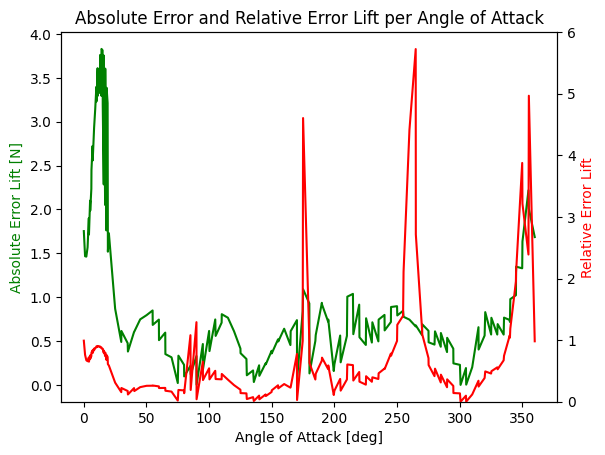

In [58]:
# error lift per angle of attack
# plot on two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df['Angle'], df['Abs_Error_Lift'], 'g-')
ax2.plot(df['Angle'], df['Rel_Error_Lift'], 'r-')
ax1.set_xlabel('Angle of Attack [deg]')
ax1.set_ylabel('Absolute Error Lift [N]', color='g')
ax2.set_ylabel('Relative Error Lift', color='r')
plt.title('Absolute Error and Relative Error Lift per Angle of Attack')
ax2.set_ylim(0, 6)
plt.savefig('results/abs_rel_error_lift_50K.png')
plt.show()

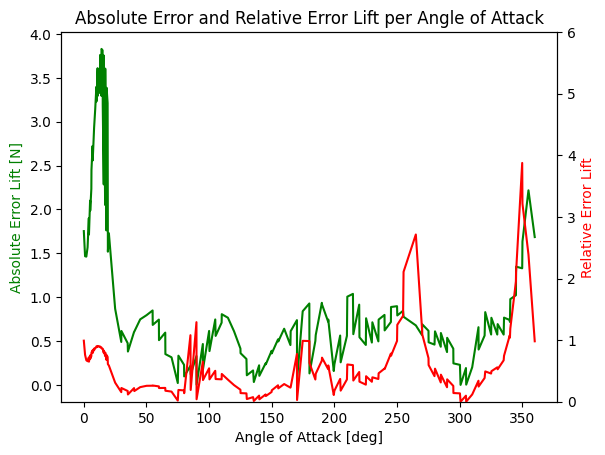

In [59]:
# error lift per angle of attack
# plot on two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df_clean['Angle'], df_clean['Abs_Error_Lift'], 'g-')
ax2.plot(df_clean['Angle'], df_clean['Rel_Error_Lift'], 'r-')
ax1.set_xlabel('Angle of Attack [deg]')
ax1.set_ylabel('Absolute Error Lift [N]', color='g')
ax2.set_ylabel('Relative Error Lift', color='r')
plt.title('Absolute Error and Relative Error Lift per Angle of Attack')
ax2.set_ylim(0, 6)
plt.show()

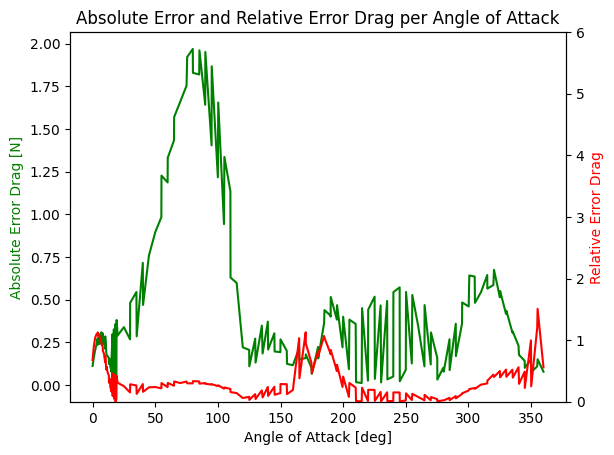

In [72]:
# absolute error drag per angle of attack
df_error_drag = pd.DataFrame()
# plot on two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df['Angle'], df['Abs_Error_Drag'], 'g-')
ax2.plot(df['Angle'], df['Rel_Error_Drag'], 'r-')
ax1.set_xlabel('Angle of Attack [deg]')
ax1.set_ylabel('Absolute Error Drag [N]', color='g')
ax2.set_ylabel('Relative Error Drag', color='r')
plt.title('Absolute Error and Relative Error Drag per Angle of Attack')
ax2.set_ylim(0, 6)
plt.savefig('results/abs_rel_error_drag_50K.png')
plt.show()

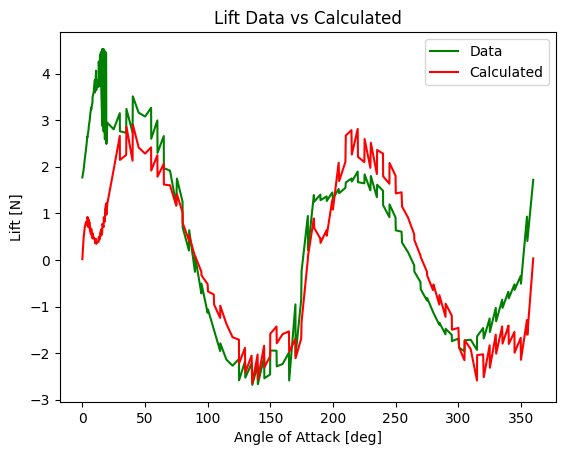

In [70]:
# plot calc lift vs data lift for all angles 
# put angle on x-axis and lift on y-axis
plt.plot(df['Angle'], df['Lift_Data'], 'g-', label='Data')
plt.plot(df['Angle'], df['Lift_Calculated'], 'r-', label='Calculated')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('Lift [N]')
plt.legend()
plt.title('Lift Data vs Calculated')
plt.savefig('results/lift_data_vs_calculated_50K.png')
plt.show()

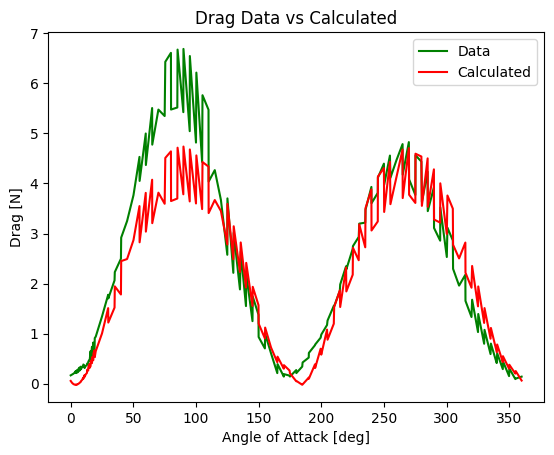

In [71]:
# plot calc drag vs data drag for all angles
# put angle on x-axis and drag on y-axis
plt.plot(df['Angle'], df['Drag_Data'], 'g-', label='Data')
plt.plot(df['Angle'], df['Drag_Calculated'], 'r-', label='Calculated')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('Drag [N]')
plt.legend()
plt.title('Drag Data vs Calculated')
plt.savefig('results/drag_data_vs_calculated_50K.png')
plt.show()

In [63]:
# print outliers
print(df[df['Rel_Error_Lift'] > 5])

     Angle  Wind_Speed  Lift_Calculated  Drag_Calculated  Lift_Data  \
124  264.9      15.926         0.550463         4.678391    -0.1165   

     Drag_Data  Abs_Error_Lift  Abs_Error_Drag  Rel_Error_Lift  Rel_Error_Drag  
124     4.7875        0.666963        0.109109        5.725005         0.02279  


In [64]:
outlier = df.iloc[124]
print(outlier)
print("Angle: ", outlier['Angle'])
print("Lift Data: ", outlier['Lift_Data'])
print("Lift Calculated: ", outlier['Lift_Calculated'])
print("Abs Error Lift: ", abs(outlier['Lift_Data'] - outlier['Lift_Calculated']))
print("Rel Error Lift: ", abs(abs(outlier['Lift_Data'] - outlier['Lift_Calculated']) / outlier['Lift_Data']))

Angle              264.900000
Wind_Speed          15.926000
Lift_Calculated      0.550463
Drag_Calculated      4.678391
Lift_Data           -0.116500
Drag_Data            4.787500
Abs_Error_Lift       0.666963
Abs_Error_Drag       0.109109
Rel_Error_Lift       5.725005
Rel_Error_Drag       0.022790
Name: 124, dtype: float64
Angle:  264.9
Lift Data:  -0.1165
Lift Calculated:  0.5504630540618474
Abs Error Lift:  0.6669630540618474
Rel Error Lift:  5.725004755895686
